In [1]:
import collections
import functools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.decomposition
import sklearn.preprocessing

In [2]:
def union(*x):
    return functools.reduce(lambda a, b: a | b, x)

In [3]:
df = pd.read_excel("sensitive_data/workforce_data.xlsx")
for col in ["Ausbildung", "Erfahrung", "Schlüsselqualifikation"]:
    df[col].fillna("", inplace=True)

In [ ]:
df

In [5]:
counter = {
    key : collections.Counter(sum([
        [y.strip() for y in x.split(";")]
        for x in df[key]
        if x.strip() != ""
    ], []))
    for key in ["Kenntnisse", "Schlüsselqualifikation", "Software"]
}

In [ ]:
for key, c in counter.items():
    fig, ax = plt.subplots(figsize=(16, 16))
    xy = sorted((val, name) for name, val in c.items())
    x, y = list(zip(*xy))
    ax.set_title(key)
    ax.set_xlabel("Anzahl Vorkommen")
    ax.barh(y, x)
    ax.grid(True)
    plt.tight_layout()
    # plt.savefig(f"employee-count-{key}.png")
    plt.show()

In [8]:
def num_entries(x):
    return [(0 if s.strip() == "" else s.count(";") + 1) for s in x]

In [9]:
for key in ["Kenntnisse", "Schlüsselqualifikation", "Software"]:
    df[f"Anzahl {key}"] = num_entries(df[key])

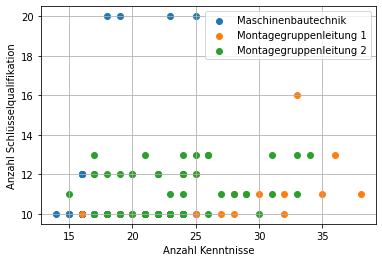

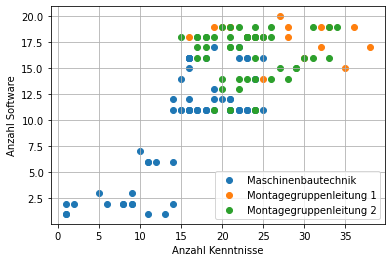

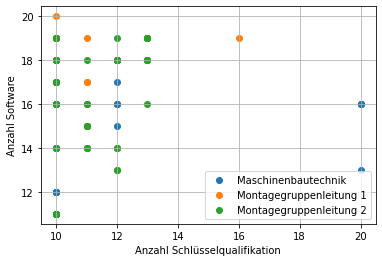

In [10]:
for key1, key2 in [
    ("Kenntnisse", "Schlüsselqualifikation"), 
    ("Kenntnisse", "Software"), 
    ("Schlüsselqualifikation", "Software")]:
    fig, ax = plt.subplots()
    for label in ["Maschinenbautechnik", "Montagegruppenleitung 1", "Montagegruppenleitung 2"]:
        k = df["Position"] == label
        j = np.logical_and(df[f"Anzahl {key1}"][k] > 0, df[f"Anzahl {key2}"][k] > 0)
        ax.scatter(df[f"Anzahl {key1}"][k][j], df[f"Anzahl {key2}"][k][j], label=label)
    ax.grid(True)
    ax.set_xlabel(f"Anzahl {key1}")
    ax.set_ylabel(f"Anzahl {key2}")
    ax.legend(loc="best")
    plt.show()

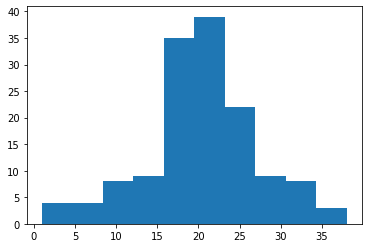

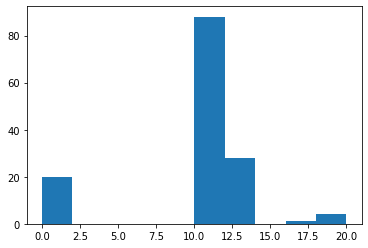

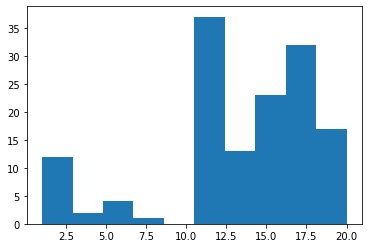

In [11]:
for key in ["Kenntnisse", "Schlüsselqualifikation", "Software"]:
    plt.hist(df[f"Anzahl {key}"])
    plt.show()

In [12]:
kenntnisse = list(union(*(
    {y.strip() for y in x.split(";")} 
    for x in df["Kenntnisse"]
)))
for j, kenntnis in enumerate(kenntnisse):
    df[f"Kenntnis_{j}"] = df["Kenntnisse"].str.contains(kenntnis, regex=False)

In [13]:
kenntnis_cov = df[[c for c in df.columns if c.startswith("Kenntnis_")]].cov()

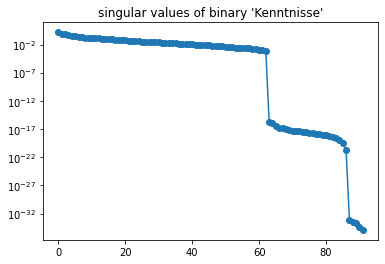

In [14]:
fig, ax = plt.subplots()
ax.plot(np.linalg.svd(kenntnis_cov.to_numpy(), compute_uv=False), "o-")
ax.set_title("singular values of binary 'Kenntnisse'")
ax.set_yscale("log")

In [15]:
pca = sklearn.decomposition.PCA(n_components=2)
x = df[[c for c in df.columns if c.startswith("Kenntnis_")]].values
x = sklearn.preprocessing.StandardScaler().fit_transform(x)
pc = pca.fit_transform(x)

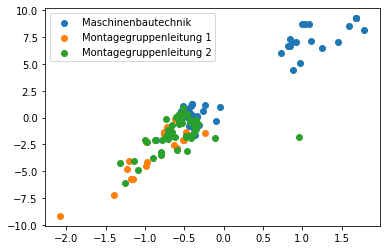

In [16]:
fig, ax = plt.subplots()
for label in ["Maschinenbautechnik", "Montagegruppenleitung 1", "Montagegruppenleitung 2"]:
    j = df["Position"] == label
    j = np.logical_and(j, pc[:,0] < 40)
    ax.scatter(pc[j,0], pc[j,1], label=label)
ax.legend(loc="best")
plt.show()